# Bose-Einstein condensate: Basic Framework

In this notebook we are going to discuss some basic aspects of the framework, using the Bose-Einstein condensate as an example. We start by initialising a system.

In [ ]:
!pip install comfit -q

In [ ]:
import comfit as cf
import matplotlib.pyplot as plt
import numpy as np

bec = cf.BoseEinsteinCondensate(2,xRes=101,yRes=101,gamma=0.01,dt=0.1)

### setting the system to a homogeneous condensate. This will be discussed more in the next tutorial 
bec.conf_initial_condition_Thomas_Fermi()


Here gamma is a dissipative factor that is removing energy from the system. The last line initialised the system as a homogeneous condensate, defining the two fields bec.psi and bec.psi_f wich is the wave function in real and fourier space. 

Since the system have periodic boundary conditions we can calculate derivatives in fourier space. We have

d f(r)/dx -> i k_x f_f(k). 

In the module the wave vectors k is given as the variable bec.k, and the x-component is bec.k[0]. The combination 1j * bec.k is provided in the bec.dif list. You can therefore find the x derivative of the field f in fourier space by running bec.dif[0]*f_f 



In [ ]:
#### task 1: Find the paritial derivative of psi wrt x by differentiating in fourier space
#    (hint: use np.fft.ifft2() and bec.psi_f)


The module contains functions for ploting different types of fields (see previous notebook), like plot_field(...) and plot_complex_field(...). 

Here is an example of how to cal a plotting function.
bec.plot_field(np.abs(bec.psi)**2,cmap_symmetric=False,colormap = 'winter')
Remember to set cmap_symmetric = False when ploting
something that is not symetric around 0.

In [ ]:
#### task 2: Plott the derivative you found above. It will look a bit strange.


We also need to evolve the wave function in time. This is done by the evolver functions. The bec has three different evolvers.

bec.evolve_relax( number_of_steps, method='ETD2RK') relaxes the system by integrating the Gross-Pitaevskii equation in imaginary time. 

bec.evolve_dGPE( number_of_steps, method='ETD2RK') evolves using the damped Gross-Pitaevskii equation and

bec.evolve_comoving_dGPE(number_of_steps, velx, method='ETD2RK') evolves the system in the frame moving at speed velx in the x direction (relative to the labframe). This solver allowes for gamma to be spatialy dependent.

All the evolvers allowes you to choose which solver you want to use. The default is ETD2RK which is a second order solver. The other implemented choise is ETD4RK which is fourt order. For details see the documentation or bully Vidar. 



In [ ]:
#### task 3: Evolve the system for 50 timesteps and plot the absolut value of psi.



We now want to look at how to initialise and track topological defects (vortices) in the bec. We can insert a vortex dipole by running the function conf_insert_vortex_dipole(self, dipole_vector=None, dipole_position=None). If the parameters dipole_vector and dipole_position is not given the dipole is put in the midle of the domain. After this one should relax the system with evolve_relax(...) to get the right core structure. 



In [ ]:
### task 4: initialise a dipole at your favoritt position and relax the system for 10 timesteps. Plot the absolute 
# value of psi



Tracking of defects can be done using the function calc_vortex_nodes(self, dt_psi=None) that finds the position and charge of the defects. If dt_psi is provided it will also find the defects' velocity. The output of this function is an array of vortex dictionaries.

In the vortex dictionary the vortx's position is saved under the key word 'position', the charge under 'charge' and the velocity under 'velocity'. 

Once this array is found the vortices can be ploted using the function 
plot_vortex_nodes(self, vortex_nodes, ax=None), where vortex_nodes is the array of dictionaries that where found with calc_vortex_nodes(self, dt_psi=None) 



In [ ]:
### task 5: evolve the system 50 time-steps.

### task 6: find dt_psi (hint use the evolver a few time steps and the variable bec.dt).
# Use this to find the defects and their velocity. Using the function bec.calc_vortex_nodes( dt_psi) 
#Plot the defect positions on top of a plot of the absolute value squared of the wavefunction
#(the colormap 'gray' look very nice for this)


### task 7: try making gamma larger and see what effect this has 

When simulating the BEC there is a range of different properties that might be of interest. Some of them are included in the library. Here is a list of the ones that are currently included

bec.calc_superfluid_current() - returns the superfluid current

bec.calc_velocity() - returns the weighted superfluid velocity ($\vec v_s\sqrt{\rho}$) 

bec.calc_hamiltonian_density() - returns the hamiltonian density

bec.calc_hamiltonian() - returns the total energy

bec.calc_kinetic_energy() - returns the total kinetic energy ($\frac{1}{2}\int d\vec r \rho v_s^2 $)

bec.calc_force_on_external_potential()- returns the total force that the condensate is exerting on the external potential. Relevant if you want to find the drag on a stirring potential. 


In [ ]:
### task 8. find and plot the superfluid current and the hamiltonian density. 




# 3D and Animations

We are now going to look at initialising a 3D system and make an animation. Most of the functions mentioned above can be used in 3D. The exeption is the function bec.conf_insert_vortex_dipole(dipole_vector=None, dipole_position=None) which is strictly 2D. Instead we have the function bec.conf_insert_vortex_ring( position=None, radius=None, normal_vector=[0, 0, 1]) to insert vortex rings into the condensate. This function can also be used to give the initial value to the wavefunction.

In [ ]:
### task 9: initialise a 3D Bose-Einstein condensate and insert two vortex rings of different radius
# and opposite pointing normal vector. Remember to relax the system. 


### task 10 use the bellow code to make an animation of the vortex rings

N = 300
for n in range(N):
    bec.evolve_dGPE(10)
    fig,ax=bec.plot_field(abs(bec.psi)**2,cmap_symmetric=False,
                clims=[0,1])
    
    cf.tool_save_plot(n)


cf.tool_make_animation_gif(n)

# Solutions

In [ ]:

import comfit as cf
import matplotlib.pyplot as plt
import numpy as np

bec = cf.BoseEinsteinCondensate(2,xRes=101,yRes=101,gamma=0.01,dt=0.1)

### setting the system to a homogeneous condensate 
bec.conf_initial_condition_Thomas_Fermi()

#### task 1 and 2
dphidx = np.fft.ifft2(bec.dif[0]*bec.psi_f)

bec.plot_complex_field(dphidx)
plt.show()



In [ ]:
# task 3
bec.evolve_dGPE(50)

bec.plot_field(np.abs(bec.psi)**2,cmap_symmetric=False,colormap = 'winter')
plt.show()


In [ ]:
#Task 4
bec.conf_insert_vortex_dipole( )

bec.evolve_relax( 10) 

bec.plot_field(np.abs(bec.psi)**2,cmap_symmetric=False,colormap = 'winter' )
plt.show()

In [ ]:
# task 5 and 6

bec.evolve_dGPE(100)
psi_old = bec.psi
N=10
bec.evolve_dGPE(N)
dt_psi = (bec.psi-psi_old)/(N*bec.dt)



nodes = bec.calc_vortex_nodes(dt_psi) 

fig,ax = bec.plot_field(np.abs(bec.psi)**2,cmap_symmetric=False,colormap = 'gray')


bec.plot_vortex_nodes(nodes,ax=ax)

plt.show()

In [ ]:
# task 8

J_s = bec.calc_superfluid_current()
H = bec.calc_hamiltonian_density()

ax=bec.plot_field(H,cmap_symmetric=False,colormap = 'cool')
bec.plot_vector_field(J_s,ax)
plt.show()

## Solutions 3D

Relaxing the BoseEinsteinCondensate...


evolving the dGPE: 100%|████████████████████████| 10/10 [00:00<00:00, 45.53it/s]


evolving the dGPE: 100%|████████████████████████| 10/10 [00:00<00:00, 42.90it/s]


evolving the dGPE: 100%|████████████████████████| 10/10 [00:00<00:00, 52.93it/s]


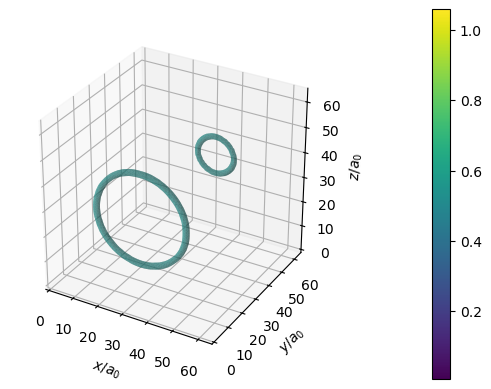

In [7]:

import comfit as cf
import matplotlib.pyplot as plt
import numpy as np

bec = cf.BoseEinsteinCondensate(3,xRes=65,yRes=65,zRes=65,gamma=0.005,dt=0.1)

bec.conf_insert_vortex_ring(radius=10, normal_vector=[0, 1, 0])

bec.conf_insert_vortex_ring(radius=20, normal_vector=[0, -1, 0])

bec.evolve_relax(20)

N = 300
for n in range(N):
    bec.evolve_dGPE(10)
    fig,ax=bec.plot_field(abs(bec.psi)**2,cmap_symmetric=False,
                clims=[0,1])
    
    cf.tool_save_plot(n)


cf.tool_make_animation_gif(n)